## Objective:
Given a new review, Classify whether it belongs to "negative class or positive class" '(binary classification problem)'


In [1]:
import pandas as pd
import numpy as np

In [2]:
# loading the data
review_dataset = pd.read_csv("C:/COMPUTER/E drive/AAIC (APPLIED AI COURSE)/Real World Problem Predict Rating Given Product Reviews On Amazon/Reviews.csv")

In [3]:
review_dataset.shape

(568454, 10)

In [4]:
review_dataset.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
review_dataset.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Score column is most important among all these - as it provides rating of the customer 
we will convert numbers into text(positive/negative)

In [6]:
review_dataset['Score'].value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

If score is greater than 3 - then we will take it as positive

If score is less than 3 - then we will take it as negative

In [7]:
def Scores(score):
    if score>3:
        return 'positive'
    elif score<3:
        return 'negative'
    else:
        return score

In [8]:
review_dataset['Score'] = review_dataset['Score'].apply(Scores)

In [9]:
review_dataset['Score'].value_counts()

positive    443777
negative     82037
3            42640
Name: Score, dtype: int64

If score is 3, we can't decide whether it is positive review or negative review . So, we discard the reviews which has score = 3

In [10]:
review_dataset = review_dataset[review_dataset['Score']!=3]

In [11]:
review_dataset['Score'].value_counts()

positive    443777
negative     82037
Name: Score, dtype: int64

There are only two types in scores . i.e, either positive or negative (either +ve review/ -ve review)

In [12]:
review_dataset.shape

(525814, 10)

### **Data pre-processing and Data Cleaning** on this dataset

**De duplication** - Removing duplicates from the dataset

In [13]:
#removing the duplicates
#Initially sort the dataframe
sorted_dataframe =  review_dataset.sort_values(by='ProductId', axis=0, kind='quicksort',inplace=False)
#axis = 0 means row-wise (index) and axis =1 means column-wise (columns)

In [14]:
sorted_dataframe

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc..."
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...
150510,150511,0006641040,A1C9K534BCI9GO,Laura Purdie Salas,0,0,positive,1344211200,Charming and childlike,"A charming, rhyming book that describes the ci..."
150511,150512,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,positive,1338249600,Must have.,I set aside at least an hour each day to read ...
150512,150513,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,positive,1325721600,A classic,I remembered this book from my childhood and g...
150513,150514,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,positive,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations....
150514,150515,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,positive,1303171200,One of our family's favorite books,This book is a family favorite and was read to...


In [15]:
#removing duplicates from the dataset
review_dataset_filtered = review_dataset.drop_duplicates(subset = {'UserId', 'ProfileName', 'Time', 'Text'},keep='first',inplace=False)

In [16]:
review_dataset_filtered.shape

(364173, 10)

dataset size has been decreased drastically, no of rows(observations) have been reduced from 5lakhs+ to 3lakhs+ , as we have removed all the duplicates

**Helpfulness Numerator should be <= Helpfulness Denominator** , we will discard the rows which have Helpfulness Numerator > Helpfulness Denominator

In [17]:
review_dataset_filtered = review_dataset_filtered[review_dataset_filtered['HelpfulnessNumerator'] <= review_dataset_filtered['HelpfulnessDenominator']]

In [18]:
review_dataset_filtered.shape

(364171, 10)

#### Text-processing techniques 

1.removing stopwords

2.stemming

3.converting into lowercase

In [19]:
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer 

In [20]:
#removing stop_words
#storing all stop words in english
stop_words = set(stopwords.words("english"))

In [21]:
#stemming - getting the rootword of the given word , for ex:- tasty --- root word for this word is 'tasti'

stemmer = nltk.stem.SnowballStemmer('english')

In [22]:
def cleanHTML(sentence):
    '''This functions removes any HTML tag present in text column in the dataset'''
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext


#re.sub() --to find and replace a part of a string using regular expressions

  #The optional count argument is the exact number of replacements to make in the input string, 
  #and if this is value is less than or equal to zero, then every match in the string is replaced.

#Method
  #replacedString = re.sub(pattern, replacement_pattern, input_str, count, flags=0)
    
#re.compile()    
    
#In Python, creating a new regular expression pattern to match many strings can be slow, 
#  so it is recommended that you compile them if you need to be testing or extracting information from many input strings 
#                                                                                             using the same expression. 

#This method returns a re.RegexObject - regular expression object

In [23]:
def cleanpunctuation(sentence): 
    '''function to clean the word of any punctuation or special characters'''
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

#Method
  #replacedString = re.sub(pattern, replacement_pattern, input_str, count, flags=0)

Applying all the three text preprocessing techniques - 'Stemming','Lowercase','removing stopwords'

In [24]:
index=0
string=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews in this list
all_negative_words=[] # store words from -ve reviews in this list
stem=''
for sentence in review_dataset_filtered['Text'].values:
    filtered_sentence=[]
    sentence=cleanHTML(sentence) # remove HTMl tags
    for words in sentence.split():
        for cleaned_words in cleanpunctuation(words).split(): #remove punctuations
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop_words):
                    stem=(stemmer.stem(cleaned_words.lower()))
                    filtered_sentence.append(stem)
                    if (review_dataset_filtered['Score'].values)[index] == 'positive': 
                        all_positive_words.append(stem) #list of all words used to describe positive reviews
                    if(review_dataset_filtered['Score'].values)[index] == 'negative':
                        all_negative_words.append(stem) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 

    string = " ".join(filtered_sentence) #final string of cleaned words 'b' given we are appending to bytes

    
    final_string.append(string)
    index+=1

In [25]:
review_dataset_filtered['Cleaned_text'] = final_string

In [26]:
review_dataset_filtered.shape

(364171, 11)

**We will select a sample of data from whole data because of hardware issues ** as we can't take all the data and use it for further processing

In [27]:
n_samples = 20000

In [28]:
review_dataset_final = review_dataset_filtered.sample(n_samples)

In [29]:
review_dataset_final.shape

(20000, 11)

#### Splitting the data - Time Based Splitting

in 70:30 ratio

In [30]:
#sorting the dataset according to time as we need time-based splitting
review_dataset_final_sorted = review_dataset_final.sort_values(by ='Time',axis=0,ascending=True,inplace=False,kind='quicksort')

In [31]:
review_dataset_final_sorted.shape

(20000, 11)

In [32]:
review_dataset_final_sorted.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned_text
1244,1245,B00002Z754,A29Z5PI9BW2PU3,Robbie,7,7,positive,961718400,Great Product,This was a really good idea and the final prod...,realli good idea final product outstand use de...
149791,149792,B00004S1C6,A3B5QJVM1TLYJG,Dan Crevier,11,12,positive,1003795200,"Nice, bright colors!",I bought these to decorate some dia de los mue...,bought decor dia los muerto skull ice ateco fo...
419993,419994,B0000A0BS5,A238V1XTSK9NFE,Andrew Lynn,46,59,negative,1064361600,Not actually for use in espresso machines,Few things I'd like to point out:<p>1. &quot;...,thing like point roast drink northern itali ma...
30628,30629,B00008RCMI,A19E94CF5O1LY7,Andrew Arnold,0,0,positive,1067040000,"I've chewed this gum many times, but used?","Nothing against the product, but it does bothe...",noth product bother link top page buy use chew...
53176,53177,B002UUJ590,A2IF5C0I5BH11F,Kala,17,18,positive,1070668800,Jelly Belly Overload!,"I'm a huge fan of Jelly Belly jelly beans, so ...",huge fan jelli belli jelli bean realli enjoy g...


In [33]:
labels = review_dataset_final_sorted['Score']

In [34]:
labels.shape

(20000,)

In [35]:
review_dataset_final_sorted.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Cleaned_text'],
      dtype='object')

In [36]:
review_dataset_final_sorted.shape

(20000, 11)

In [37]:
review_dataset_final_sorted_without_labels = review_dataset_final_sorted.drop(review_dataset_final_sorted.columns[6],axis=1,inplace=False)

In [38]:
review_dataset_final_sorted_without_labels.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Time', 'Summary', 'Text', 'Cleaned_text'],
      dtype='object')

In [39]:
review_dataset_final_sorted_without_labels.shape

(20000, 10)

#### Splitting the data in the ratio 70:30 (train_data and test_data)

In [40]:
from sklearn.model_selection import train_test_split
#breaking into train and test data
train_data,test_data,train_data_labels,test_data_labels = train_test_split(review_dataset_final_sorted['Cleaned_text'].values,review_dataset_final_sorted['Score'].values,test_size = 0.3,shuffle = False)

In [41]:
train_data.shape

(14000,)

In [42]:
test_data.shape

(6000,)

In [43]:
train_data_labels.shape

(14000,)

In [44]:
test_data_labels.shape

(6000,)

#### **Creating a function for finding optimal k without using GridSearch CV**

As we will be checking the optimal K for different techniques, we will create a function. So, we can reuse this function and reduce the code for finding optimal k
#### To Find the optimal K we will use 10 fold cross validation method (TimeSeriesSplit) as we need to perform time-series based splitting . Based on misclassifiction error for every K, we will decide the best K on Train Data

As we will use only train_data for cross vaildation to find optimal k , X_train, Y_train are taken from train_data itself.

In [45]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.model_selection import TimeSeriesSplit

C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [46]:
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [48]:
def finding_optimal_k(train_data):
    '''This function will output the optimal k'''
   
    #creating odd list of K for KNN , we are taking max_k value as 49 and testing the best k between 1 to 49
    myList = list(range(1,50))
    neighbors = list(filter(lambda x: x % 2 != 0, myList))
    
    #number of splits (as we need 10-fold CV , we use n-splits = 10)
    number_splits = 10

    #Storing accuracy for different k-values
    k_accuracy = []

    #accuracy_dup (to calculate mis-classification error)
    accuracy_dup = []
    
    #as we need time-based splitting , we use time-series split
    tscv = TimeSeriesSplit(n_splits=number_splits)
    
    # perform 10-fold cross validation
    for k in neighbors:
        #Storing accuracy for each fold
        accuracy_list = []
        accuracy_list_dup = []#creating this for calculating MSE
        for train,cv in tscv.split(train_data):
            if(train.size > k):
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(train_data[train],train_data_labels[train])
                accuracy_list.append(knn.score(train_data[cv],train_data_labels[cv])*100)
                accuracy_list_dup.append(knn.score(train_data[cv],train_data_labels[cv]))
        if(accuracy_list):
            accuracy_array = np.array(accuracy_list)
            accuracy_array_dup = np.array(accuracy_list_dup)#creating this for calculating MSE
        k_accuracy.append(accuracy_array.mean())
        accuracy_dup.append(accuracy_array_dup.mean())
    k_accuracy_array = np.array(k_accuracy)
    
    # changing to misclassification error (MSE - MisClassification error)
    MSE = [1-x for x in accuracy_dup] #we know error = 1-accuracy

    # determining best k
    optimal_k = neighbors[MSE.index(min(MSE))]
    print(f"The optimal number of neighbors is {optimal_k}")
    
    #print(MSE)
    #print(k_accuracy)

    plt.subplot(221)
    plt.plot(list(filter(lambda x: x % 2 != 0, myList)),MSE,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    # print("the misclassification error for each k value is : ", np.round(MSE,3))

    
    plt.subplot(224)
    plt.plot(np.arange(1,50,2),k_accuracy_array)
    plt.title("accuracy for different k-values")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    
   
    return optimal_k

#### Using GridSearchCV  (creating a function to reuse it again)

Cross-validation, simply separating test and training data and validate training results with test data. There are two cross validation techniques that I know.

First, Test/Train cross validation. Splitting data as test and train.

Second, k-fold cross-validation split your data into k bins, use each bin as testing data and use rest of the data as training data and validate against testing data. Repeat the process k times. And Get the average performance. k-fold cross validation especially useful for small dataset since it maximizes both the test and training data.

Grid Search; systematically working through multiple combinations of parameter tunes, cross validate each and determine which one gives the best performance.You can work through many combination only changing parameters a bit.

In [49]:
%time
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

Wall time: 0 ns


In [50]:
def GridSearchCV_bruteForce(train_data):
    knn = KNeighborsClassifier(algorithm='brute')
    param_grid = {'n_neighbors':np.arange(1,50,2)} #params we need to try on classifier
    tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
    gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
    gsv.fit(train_data,train_data_labels)
    print(f"Best HyperParameter is : ",gsv.best_params_)
    print(f"Best Accuracy is {(gsv.best_score_)*100}")

In [51]:
def GridSearchCV_kd_tree(train_data):
    knn = KNeighborsClassifier(algorithm='kd_tree')
    param_grid = {'n_neighbors':np.arange(1,50,2)} #params we need to try on classifier
    tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
    gsv = GridSearchCV(knn,param_grid,cv=tscv,verbose=1)
    gsv.fit(train_data,train_data_labels)
    print(f"Best HyperParameter is : ",gsv.best_params_)
    print(f"Best Accuracy is {(gsv.best_score_)*100}")
    

### Using Bag-of-Words (BoW) model
we have done **time-based-splitting** and we featurize vectors from text and then we use KNN  to design a model which will predict whether the given class is negative or positive

We will apply bag_of_words technique to our final_reviews_dataset of cleaned_text column  - which is our cleaned dataset


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() #as we are not specifying number_of_grams , it generates uni-grams

storing this function in a variable count_vect. 

CountVectorizer returns Convert a collection of text documents to a matrix of token counts

This implementation produces a sparse representation of the counts using scipy.sparse.csr_matrix.

In [53]:
#vectorizing train_data
bag_of_words_model_train_data = count_vect.fit_transform(train_data)

In [54]:
type(bag_of_words_model_train_data)

scipy.sparse.csr.csr_matrix

In [55]:
bag_of_words_model_train_data.shape

(14000, 15291)

In [56]:
#Scaling the column values to get all the column into same intervaL
from sklearn.preprocessing import StandardScaler
bow_scaled_train_data = StandardScaler(with_mean=False).fit_transform(bag_of_words_model_train_data) # as this is a sparse-matrices, we will pass with_mean = False

C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [57]:
type(bow_scaled_train_data)

scipy.sparse.csr.csr_matrix

In [58]:
bow_scaled_train_data.shape

(14000, 15291)

In [59]:
#vectorizing test_data
##-----------We are using transform (not fit_transform) because we need to transform the data according to dimensions of train_data
bag_of_words_model_test_data = count_vect.transform(test_data)

In [60]:
type(bag_of_words_model_test_data)

scipy.sparse.csr.csr_matrix

In [61]:
bag_of_words_model_test_data.shape

(6000, 15291)

In [62]:
#Standardizing the data
bow_scaled_test_data = StandardScaler(with_mean=False).fit_transform(bag_of_words_model_test_data) # as this is a sparse-matrices, we will pass with_mean = False

C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [63]:
type(bag_of_words_model_test_data)

scipy.sparse.csr.csr_matrix

In [64]:
bow_scaled_test_data.shape

(6000, 15291)

#### finding optimal k , without gridSearchCV

The optimal number of neighbors is 7


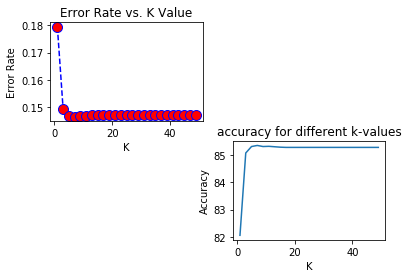

In [65]:
optimal_k_brute_force = finding_optimal_k(bow_scaled_train_data)


From this we can conclude that optimal value of k is 7 for bag_of_words_model data . We will use this value to find accuracy of test_data (untouched data)

#### A. Using knn algorithm (BRUTEFORCE) and using GridSearchCV - Bag0fWords

In [66]:
GridSearchCV_bruteForce(bow_scaled_train_data)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 7}
Best Accuracy is 85.3380503144654


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 18.6min finished


**Testing accuracy on test_data (untouched data)**


In [158]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm='brute')
knn.fit(bow_scaled_train_data,train_data_labels)
test_labels_predict = knn.predict(bow_scaled_test_data)

In [159]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 7 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 7 is 83.18%


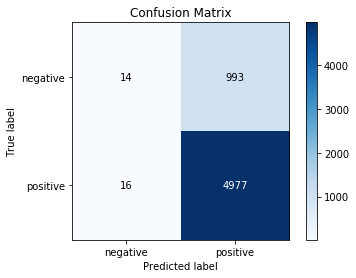

In [160]:
#importing scikitplot library
#plotting a confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

#### B.Using knn algorithm (kd-tree) and using GridSearchCV

for kd_tree , we need to convert sparse matrix into dense matrix

In [70]:
from sklearn.decomposition import TruncatedSVD

In [71]:
svd = TruncatedSVD(n_components=100)

In [72]:
bow_scaled_train_data_svd = svd.fit_transform(bow_scaled_train_data)

In [73]:
type(bow_scaled_train_data_svd)

numpy.ndarray

In [74]:
bow_scaled_train_data_svd.shape

(14000, 100)

In [75]:
bow_scaled_test_data_svd = svd.transform(bow_scaled_test_data)

In [76]:
type(bow_scaled_test_data_svd)

numpy.ndarray

In [77]:
bow_scaled_test_data_svd.shape

(6000, 100)

In [78]:
GridSearchCV_kd_tree(bow_scaled_train_data_svd)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 11}
Best Accuracy is 85.45597484276729


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 98.7min finished


**Testing accuracy on test_data(untouched data)**

In [79]:
knn = KNeighborsClassifier(n_neighbors=11,algorithm='kd_tree')
knn.fit(bow_scaled_train_data_svd,train_data_labels)
test_labels_predict = knn.predict(bow_scaled_test_data_svd)

In [80]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 11 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 11 is 83.22%


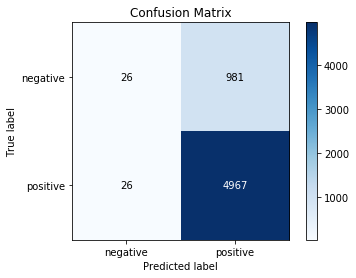

In [81]:
#importing scikitplot library
#plotting a confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

**Observation** :

1.Even though we have got 83.22% accuracy,that should not be taken for granted with this data mainly with KNN because it is imbalanced data as well as it is high demsional data because KNN doesn't perform so good in these cases.

2.We have obtained almost same accuracy when we tried with different methods in algorithm (brute-force approach and kd_tree approach)

3.Using **Brute force method** we got **83.18%** with **no.of nearest neighbors** as **7**, whereas with **kd_tree** we got **83.22%** with **no.of nearest neighbors** as **11**

### Using tf-idf method 
                      to extract the features from cleaned text
 Then applying knn on that data and calculate the accuracy

In [45]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vector = TfidfVectorizer()  

#not taking bi-grams because we have considered uni-grams in Bag_of_words
#comparison to be meaningful to some extent, we don't consider bi-grams

In [46]:
#vectorizing train data
tf_idf_model_train_data = tf_idf_vector.fit_transform(train_data)

In [47]:
tf_idf_model_train_data.shape

(14000, 15427)

In [48]:
type(tf_idf_model_train_data)

scipy.sparse.csr.csr_matrix

In [50]:
from sklearn.preprocessing import StandardScaler 

In [51]:
#scaling train data
tf_idf_scaled_train_data = StandardScaler(with_mean=False).fit_transform(tf_idf_model_train_data)

In [52]:
tf_idf_scaled_train_data.shape

(14000, 15427)

In [53]:
#vectorizing test data
tf_idf_model_test_data = tf_idf_vector.transform(test_data)

In [54]:
tf_idf_model_test_data.shape

(6000, 15427)

In [55]:
type(tf_idf_model_test_data)

scipy.sparse.csr.csr_matrix

In [56]:
#scaling test data
tf_idf_scaled_test_data = StandardScaler(with_mean=False).fit_transform(tf_idf_model_test_data)

In [57]:
tf_idf_scaled_test_data.shape

(6000, 15427)

#### finding optimal k , without gridSearchCV

The optimal number of neighbors is 7


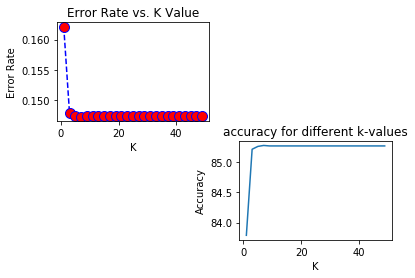

In [93]:
optimal_k_brute_force = finding_optimal_k(tf_idf_scaled_train_data)

#### A. Using knn algorithm (BRUTEFORCE) and using GridSearchCV - tf_idf

In [94]:
GridSearchCV_bruteForce(tf_idf_scaled_train_data)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 7}
Best Accuracy is 85.2751572327044


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 18.8min finished


**Testing accuracy on test_data (untouched data)**

In [161]:
knn = KNeighborsClassifier(n_neighbors=7,algorithm='brute')
knn.fit(tf_idf_scaled_train_data,train_data_labels)
test_labels_predict = knn.predict(tf_idf_scaled_test_data)

In [162]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 7 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 7 is 83.15%


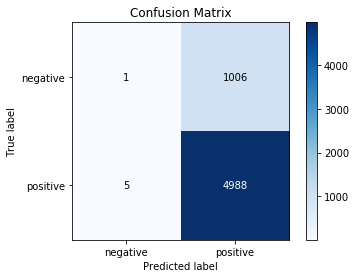

In [163]:
#importing scikitplot library
#plotting a confusion matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

#### B.Using knn algorithm (kd-tree) and using GridSearchCV

for kd_tree , we need to convert sparse matrix into dense matrix

In [98]:
svd = TruncatedSVD(n_components=100)
tf_idf_scaled_train_data_svd = svd.fit_transform(tf_idf_scaled_train_data)

In [99]:
type(tf_idf_scaled_train_data_svd)


numpy.ndarray

In [100]:
tf_idf_scaled_train_data_svd.shape

(14000, 100)

In [101]:
tf_idf_scaled_test_data_svd = svd.transform(tf_idf_scaled_test_data)

In [102]:
type(tf_idf_scaled_test_data_svd)

numpy.ndarray

In [103]:
tf_idf_scaled_test_data_svd.shape

(6000, 100)

In [104]:
GridSearchCV_kd_tree(tf_idf_scaled_train_data_svd)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 17}
Best Accuracy is 85.36163522012579


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 80.6min finished


**Testing accuracy on test_data(untouched data)**

In [164]:
knn = KNeighborsClassifier(n_neighbors=17,algorithm='kd_tree')
knn.fit(tf_idf_scaled_train_data_svd,train_data_labels)
test_labels_predict = knn.predict(tf_idf_scaled_test_data_svd)

In [165]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 17 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 17 is 83.32%


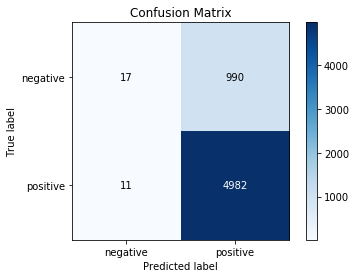

In [166]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

**Observation :**

1.Accuracy of tf_idf model is slightly greater than accuracy of BoW_model.

2.Using **Brute force method** we got **83.15%** with **no.of nearest neighbors** as **7**, whereas with **kd_tree** we got **83.32%** with **no.of nearest neighbors** as **17**

3.Number of nearest neighbors has been increased drastically from one model(brute_force) to another model(kd_tree).In kd_tree, We have reduced our total dimensions to 100 and operated only on this dimensions , while that is not the case with brute_force method. 

### Using word2vec model

#### train_data


In [59]:
import gensim
list_of_sentences_train = []
for sentence in train_data:
    list_of_sentences_train.append(sentence.split())

C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [60]:
#training the model with word2Vec #size-dimensionality #min_count-no.of.minimum repetitions #workers-no.of.cores
word2Vec_model =  gensim.models.Word2Vec(list_of_sentences_train,min_count=5,size=30,workers=4)

In [61]:
words = list(word2Vec_model.wv.vocab)
print(len(words))

5236


#### AvgWord2Vec on train_data

In [111]:
# average Word2Vec
# compute average word2vec for each review.
sentence_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in list_of_sentences_train: # for each review/sentence (which is computed while computing Word2Vec)
    sentence_vector = np.zeros(30) # as word vectors are of zero length '30 because while defining a model , 
                                                                                #            we specified no of dimensions as 30
    count_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word] #creating a vector for each word
            sentence_vector += vector #storing each created vector in a sentence vector list. for ex- in sentence if there are
                                      # 5words, then 5 vectors will be created as we know for each word, one vector is created.
            count_words += 1 #counting the no.of words in sentence as we need to compute as it is avg word2vec
        except:
            pass
    sentence_vector /= count_words #sentence_vector = (w2v(w1)+w2v(w2)+w2v(w3)+...n)
                                  #count_words = (1/n)
                                  # avgWord2Vec = [(1/n)*(w2v(w1)+w2v(w2)+w2v(w3)+...n)] #n means n words...
    sentence_vectors.append(sentence_vector)


In [112]:
len(sentence_vectors) #no of elements in list = 14000

14000

In [113]:
avg_word2vec_train_data = np.array(sentence_vectors)

In [114]:
#normalizing
avg_word2vec_train_data_scaled = StandardScaler(with_mean=False).fit_transform(avg_word2vec_train_data)

In [115]:
avg_word2vec_train_data_scaled.shape

(14000, 30)

In [116]:
avg_word2vec_train_data_scaled

array([[-0.56875195,  2.1102274 , -0.65822494, ..., -0.34280516,
        -0.79045792, -0.81966293],
       [-0.3282793 ,  1.93876274, -0.00962491, ..., -0.25312058,
        -0.85412343, -0.38722493],
       [-0.47245675,  1.596126  , -0.57670612, ..., -0.58075062,
        -0.74734472, -0.73451947],
       ...,
       [-0.56567461,  3.9653231 , -0.8842538 , ...,  0.31461887,
        -1.44686392, -0.76844792],
       [-2.34538178,  1.57891956,  0.10558526, ...,  1.8975616 ,
        -0.95092647, -0.88199866],
       [-0.61716552,  1.39768794,  0.29410252, ...,  0.51155687,
        -0.39025833, -0.28515795]])

#### test_data

In [62]:
import gensim
list_of_sentences_test = []
for sentence in test_data:
    list_of_sentences_test.append(sentence.split())

In [63]:
#training the model with word2Vec #size-dimensionality #min_count-no.of.minimum repetitions #workers-no.of.cores
word2Vec_model =  gensim.models.Word2Vec(list_of_sentences_test,min_count=5,size=30,workers=4)

In [64]:
words = list(word2Vec_model.wv.vocab)
print(len(words))

3581


#### AvgWord2Vec on test_data

In [120]:
# average Word2Vec
# compute average word2vec for each review.
sentence_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in list_of_sentences_test: # for each review/sentence (which is computed while computing Word2Vec)
    sentence_vector = np.zeros(30) # as word vectors are of zero length '30 because while defining a model , 
                                                                                #            we specified no of dimensions as 30
    count_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word] #creating a vector for each word
            sentence_vector += vector #storing each created vector in a sentence vector list. for ex- in sentence if there are
                                      # 5words, then 5 vectors will be created as we know for each word, one vector is created.
            count_words += 1 #counting the no.of words in sentence as we need to compute as it is avg word2vec
        except:
            pass
    sentence_vector /= count_words #sentence_vector = (w2v(w1)+w2v(w2)+w2v(w3)+...n)
                                  #count_words = (1/n)
                                  # avgWord2Vec = [(1/n)*(w2v(w1)+w2v(w2)+w2v(w3)+...n)] #n means n words...
    sentence_vectors.append(sentence_vector)


In [121]:
len(sentence_vectors) #no of elements in list = 6000

6000

In [122]:
avg_word2vec_test_data = np.array(sentence_vectors)

In [123]:
avg_word2vec_test_data.shape

(6000, 30)

In [124]:
#Standardizing
avg_word2vec_test_data_scaled = StandardScaler(with_mean=False).fit_transform(avg_word2vec_test_data)

In [125]:
avg_word2vec_test_data_scaled

array([[-0.44796959,  2.51334391,  4.27751442, ..., -2.28539306,
        -3.58704604,  1.65937066],
       [-1.27171665,  5.35779698,  1.96011137, ..., -1.52212945,
        -5.06736006, -1.52796528],
       [ 0.70309191,  4.73476219,  1.83869768, ..., -3.15306225,
        -6.01862521, -0.96241746],
       ...,
       [-1.6804685 ,  5.33995787,  1.46643119, ..., -0.76143737,
        -5.7483915 , -2.20659298],
       [-1.22302968,  6.23515756,  3.05804166, ..., -3.33940661,
        -4.56445369, -1.09511887],
       [-2.82004661,  5.99105556,  3.43833884, ..., -0.66918845,
        -4.80823668, -0.12397149]])

#### finding optimal k , without gridSearchCV

The optimal number of neighbors is 13


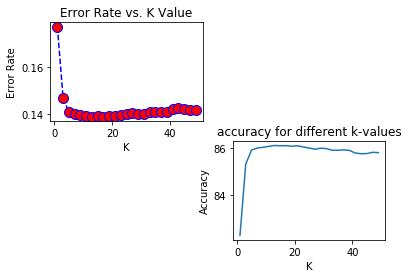

In [126]:
optimal_k_brute_force = finding_optimal_k(avg_word2vec_train_data_scaled)

#### A. Using knn algorithm (BRUTEFORCE) and using GridSearchCV - tf_idf

In [127]:
GridSearchCV_bruteForce(avg_word2vec_train_data_scaled)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 13}
Best Accuracy is 86.1006289308176


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 11.7min finished


#### Testing accuracy on test_data (untouched data)

In [167]:
knn = KNeighborsClassifier(n_neighbors=13,algorithm='brute')
knn.fit(avg_word2vec_train_data_scaled,train_data_labels)
test_labels_predict = knn.predict(avg_word2vec_test_data_scaled)

In [168]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 13 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 13 is 83.25%


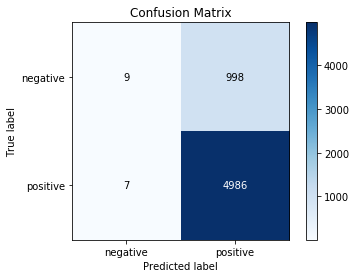

In [169]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

#### B.Using knn algorithm (kd-tree) and using GridSearchCV

In [131]:
type(avg_word2vec_train_data)

numpy.ndarray

In [132]:
GridSearchCV_kd_tree(avg_word2vec_train_data_scaled)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 13}
Best Accuracy is 86.1006289308176


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.6min finished


#### Testing accuracy on test_data (untouched data)

In [170]:
knn = KNeighborsClassifier(n_neighbors=13,algorithm='kd_tree')
knn.fit(avg_word2vec_train_data_scaled,train_data_labels)
test_labels_predict = knn.predict(avg_word2vec_test_data_scaled)

In [171]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 13 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 13 is 83.25%


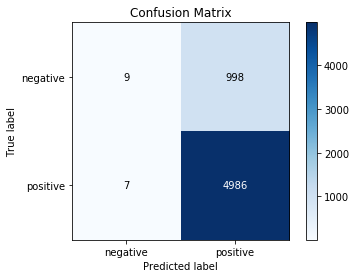

In [172]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

#### Observation :

1.Using **Brute force method** we got **83.25%** with **no.of nearest neighbors** as **13**, whereas with **kd_tree** we got **83.25%** with **no.of nearest neighbors** as **13**
2.This model's accuracy is slightly less than accuracy of tf_idf(kd_tree) model, but the number of nearest neighbors is 13 , which is less than tf_idf(kd_tree) model, optimal_k should also be not small or not too big as it may result in underfit and overfit issues.Moreover, k and accuracy both are stable(didn't change from brute_force to kd_tree).So, we can consider this is one of the accurate among all the other models till now.

### Using tf-idf-Word2Vec model
#### train_data


In [65]:
# TF-IDF weighted Word2Vec
tfidf_features = tf_idf_vector.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sentence_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sentence in list_of_sentences_train: # for each review/sentence
    sentence_vector = np.zeros(30) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = tf_idf_model_train_data[row, tfidf_features.index(word)]
            sentence_vector += (vector * tfidf)
            weight_sum += tfidf      
        except:
            pass
    sentence_vector /= weight_sum
    tfidf_sentence_vectors.append(sentence_vector)
    row += 1
    


C:\Users\CHAMANTH MVS\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


In [66]:
len(tfidf_sentence_vectors)

14000

In [67]:
tfidf_sentence_vectors

[array([-0.53217643, -0.19924649,  0.33758512, -0.59537757, -0.18451508,
         0.21610906, -0.21623693,  0.03866917,  0.243462  ,  0.31980785,
         0.08837243, -0.16742232, -0.33074392, -0.02220966, -0.14879627,
         0.09239848,  0.26954312,  0.2901748 , -0.03646594,  0.2887463 ,
         0.04232601,  0.239608  ,  0.10586328, -0.60020254, -0.26563577,
         0.72342802,  0.31989464,  0.14489405,  0.23069863,  0.90828181]),
 array([-0.90387549,  0.02777011,  0.44833005, -0.80559818, -0.14289834,
         0.51686628, -0.44195563,  0.09712079,  0.37704749,  0.22050148,
         0.32405673, -0.33536037, -0.00915325,  0.30978715, -0.02996773,
        -0.07321045,  0.02075673,  0.43549123,  0.16682377,  0.46076731,
        -0.07982934,  0.6090126 ,  0.00869395, -0.74391801, -0.4329474 ,
         0.61650227,  0.32129478,  0.23986181,  0.254381  ,  1.16206483]),
 array([-1.12889765,  0.12006382,  0.82906977, -0.62295307, -0.19398271,
         0.33264174, -0.25176546,  0.22606382, 

In [139]:
tfidf_sentence_vector_train = np.array(tfidf_sentence_vectors)

In [140]:
tfidf_sentence_vector_train.shape

(14000, 30)

In [141]:
tfidf_sentence_vector_train_scaled = StandardScaler(with_mean=False).fit_transform(tfidf_sentence_vector_train)

In [142]:
tfidf_sentence_vector_train_scaled.shape

(14000, 30)

#### test_data

In [143]:
# TF-IDF weighted Word2Vec
tfidf_features = tf_idf_vector.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sentence_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sentence in list_of_sentences_test: # for each review/sentence
    sentence_vector = np.zeros(30) # as word vectors are of zero length
    weight_sum = 0; # num of words with a valid vector in the sentence/review
    for word in sentence: # for each word in a review/sentence
        try:
            vector = word2Vec_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = tf_idf_model_test_data[row, tfidf_features.index(word)]
            sentence_vector += (vector * tfidf)
            weight_sum += tfidf
        except:
            pass
    sentence_vector /= weight_sum
    tfidf_sentence_vectors.append(sentence_vector)
    row += 1
    

In [144]:
len(tfidf_sentence_vectors)

6000

In [145]:
tfidf_sentence_vectors

[array([-0.07605416,  0.22843073,  0.69912519, -0.73396019, -0.0563762 ,
        -0.63382859,  0.29731901, -1.05761802,  0.62423859,  0.33509653,
        -0.14141596, -0.5787664 ,  1.21051019, -0.49917572,  0.06146459,
         0.21130353,  0.50516113, -0.05754317, -0.09692782,  0.20265181,
         1.00586446,  0.2169828 , -0.16053769, -0.13197203,  0.03587709,
         0.4971804 ,  0.65546833, -0.24549967, -0.51273784,  0.40428106]),
 array([-0.1553227 ,  0.41226838,  0.34111139, -0.31237603, -0.05158121,
        -0.99822055, -0.06163264, -0.67134518,  0.40303551, -0.10488388,
        -0.45795973, -0.77297947,  1.01040508, -0.24218439, -0.19324284,
        -0.03411115, -0.04998827, -0.18600415,  0.12112498,  0.10477552,
         0.65980342,  0.58756588, -0.56843998, -0.38797161,  0.39090934,
         0.49520971,  0.17748273, -0.1438853 , -0.51752226, -0.31940383]),
 array([ 0.06843937,  0.36869556,  0.34833973, -0.38991358,  0.25919653,
        -0.86885389, -0.13203292, -0.7382908 , 

In [146]:
tfidf_sentence_vector_test = np.array(tfidf_sentence_vectors)

In [147]:
tfidf_sentence_vector_test.shape

(6000, 30)

In [148]:
tfidf_sentence_vector_test_scaled = StandardScaler(with_mean=False).fit_transform(tfidf_sentence_vector_test)

In [149]:
tfidf_sentence_vector_test_scaled.shape

(6000, 30)

#### A. Using knn algorithm (BRUTEFORCE) and using GridSearchCV - tf_idf

In [150]:
GridSearchCV_bruteForce(tfidf_sentence_vector_train_scaled)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 27}
Best Accuracy is 85.29874213836479


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 13.7min finished


#### Testing accuracy on test_data (untouched data)

In [173]:
knn = KNeighborsClassifier(n_neighbors=27,algorithm='brute')
knn.fit(tfidf_sentence_vector_train_scaled,train_data_labels)
test_labels_predict = knn.predict(tfidf_sentence_vector_test_scaled)

In [174]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 27 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 27 is 83.28%


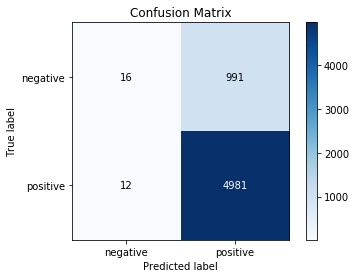

In [175]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

#### B.Using knn algorithm (kd-tree) and using GridSearchCV¶

In [154]:
GridSearchCV_kd_tree(tfidf_sentence_vector_train_scaled)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
Best HyperParameter is :  {'n_neighbors': 27}
Best Accuracy is 85.29874213836479


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 15.2min finished


#### Testing accuracy on test_data (untouched data)

In [176]:
knn = KNeighborsClassifier(n_neighbors=27,algorithm='kd_tree')
knn.fit(tfidf_sentence_vector_train_scaled,train_data_labels)
test_labels_predict = knn.predict(tfidf_sentence_vector_test_scaled)

In [177]:
#accuracy metric
accuracy = accuracy_score(test_data_labels,test_labels_predict)
print(f"accuracy for test_data with k = 27 is {round(accuracy *100,2)}%")

accuracy for test_data with k = 27 is 83.28%


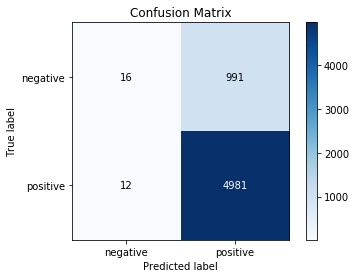

In [178]:
#plotting confusion matrix
skplt.metrics.plot_confusion_matrix(test_data_labels,test_labels_predict)

**Observation**:

1.Using Brute force method we got 83.28% with no.of nearest neighbors as 27, whereas with kd_tree we got 83.28% with no.of nearest neighbors as 27

### Final Observation :
   ####   MODEL---------Algorithm----------ACCURACY---------NEAREST NEIGHBORS

    Bag_of_words       brute_force              83.18%               7

    Bag_of_words       kd_tree                  83.22%               11

    tf_idf             brute_force              83.15%               7

    tf_idf             kd_tree                  83.32%               17

    avg_word2Vec       brute_force              83.25%               13

    avg_word2Vec       kd_tree                  83.25%               13

    tf_idf_word2Vec    brute_force              83.28%               27

    tf_idf_word2Vec    kd_tree                  83.28%               27




1. Of all the models, avg_W2V_model accuracy(83.25%) with number of nearest neighbors as 13. All the models have given almost same % of accuracy
2. There are few other models which has given slighltly more accuracy when compared to avg_word2Vec. But, they have given better accuracy with more no.of.nearest neighbors. So, we will be considering avg_w2v model for predicting future points given (classify them whether they belong to positive class or negative class)
3. **But**, as it is imbalanced data , we don't consider accuracy metric because it will be biased towards one class.
4. As we know, KNN is not good algorithm to use for high dimensional data (in terms of time&space complexity) and also calculating distances between two huge vectors creates a problem.




1. Of all the models, avg_W2V_model accuracy(83.25%) with number of nearest neighbors as 13. All the models have given almost same % of accuracy
2. There are few other models which has given slighltly more accuracy when compared to avg_word2Vec. But, they have given better accuracy with more no.of.nearest neighbors. So, we will be considering avg_w2v model for predicting future points given (classify them whether they belong to positive class or negative class)
3. **But**, as it is imbalanced data , we don't consider accuracy metric because it will be biased towards one class.
4. As we know, KNN is not good algorithm to use for high dimensional data (in terms of time&space complexity) and also calculating distances between two huge vectors creates a problem.
